## **News Category Classification (Sports, Politics, Business, Tech)**

### **Introduction**

In today’s digital era, online news platforms publish a massive number of articles every day across different domains such as sports, politics, business, and technology. Manually organizing these articles is inefficient and prone to errors. As a result, automatic news classification using machine learning has become an important application of Natural Language Processing (NLP).

This project focuses on building a News Category Classification system that automatically classifies news articles into predefined categories using machine learning techniques. By applying text preprocessing, feature extraction, and supervised learning algorithms, the system is able to accurately predict the category of unseen news articles.

 **Objective**

The objective of this project is to classify news articles into one of the following four categories:

* Sports

* Politics

* Business

* Technology

**Approach**

The project follows a structured machine learning workflow:

* Data loading and exploration

* Text preprocessing and cleaning

* Feature extraction using TF-IDF

* Model training using multiple classifiers

* Performance evaluation and comparison

* Final prediction on new inputs

## **Importing Required Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jikum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Data Loading and Understanding**

In [37]:
df = pd.read_csv(r"C:\Users\jikum\Downloads\archive\train.csv")

In [38]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [39]:
df.tail()

,Class Index,Title,Description
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [40]:
df.shape

(120000, 3)

### **Data Preprocessing**

In [41]:
df = df.sample(n=10000, random_state=42).reset_index(drop=True)
df.head()

,Class Index,Title,Description
0,3,"BBC set for major shake-up, claims newspaper","London - The British Broadcasting Corporation,..."
1,3,Marsh averts cash crunch,Embattled insurance broker #39;s banks agree t...
2,2,"Jeter, Yankees Look to Take Control (AP)",AP - Derek Jeter turned a season that started ...
3,4,Flying the Sun to Safety,When the Genesis capsule comes back to Earth w...
4,3,Stocks Seen Flat as Nortel and Oil Weigh,NEW YORK (Reuters) - U.S. stocks were set to ...


> For faster training and evaluation, a random sample of 10,000 articles was selected.

In [42]:
df.shape

(10000, 3)

In [43]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

### **Combine Text Columns**

In [44]:
df['text'] = df["Title"].fillna("") + " " + df["Description"].fillna("")

In [45]:
df = df.drop(columns=['Title', 'Description'])
df.head()

,Class Index,text
0,3,"BBC set for major shake-up, claims newspaper L..."
1,3,Marsh averts cash crunch Embattled insurance b...
2,2,"Jeter, Yankees Look to Take Control (AP) AP - ..."
3,4,Flying the Sun to Safety When the Genesis caps...
4,3,Stocks Seen Flat as Nortel and Oil Weigh NEW ...


### **Label Mapping**

In [46]:
label_map = {
    1: "Politics",
    2: "Sports",
    3: "Business",
    4: "Technology"
}

df["label"] = df["Class Index"].map(label_map)

In [47]:
df

,Class Index,text,label
0,3,"BBC set for major shake-up, claims newspaper L...",Business
1,3,Marsh averts cash crunch Embattled insurance b...,Business
2,2,"Jeter, Yankees Look to Take Control (AP) AP - ...",Sports
3,4,Flying the Sun to Safety When the Genesis caps...,Technology
4,3,Stocks Seen Flat as Nortel and Oil Weigh NEW ...,Business
...,...,...,...
9995,4,"In Another Reversal, Intel Kills 4 Gig Chip Le...",Technology
9996,1,Bush Taps Nicholson for Veterans Affairs (AP) ...,Politics
9997,3,Stocks Inch Up After Durable Goods Report NEW...,Business
9998,3,Fleet workers get pink slips STAFF WRITER; Sta...,Business


### **Data Visualization**

> These visualizations help in understanding the dataset balance and content characteristics.

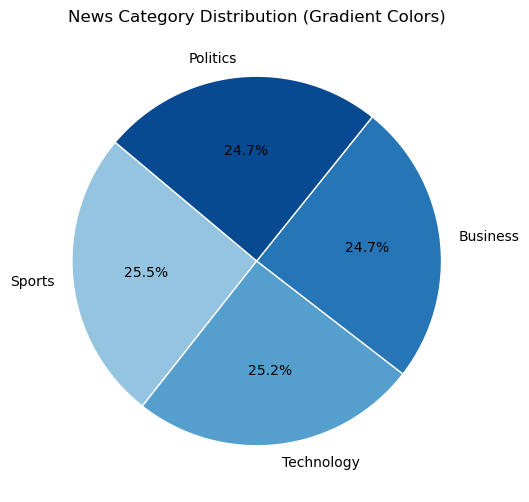

In [48]:
counts = df['label'].value_counts()

# color palette
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(counts)))

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('News Category Distribution (Gradient Colors)')
plt.show()

> A pie chart shows the distribution of news categories.

### **Text Length Analysis**

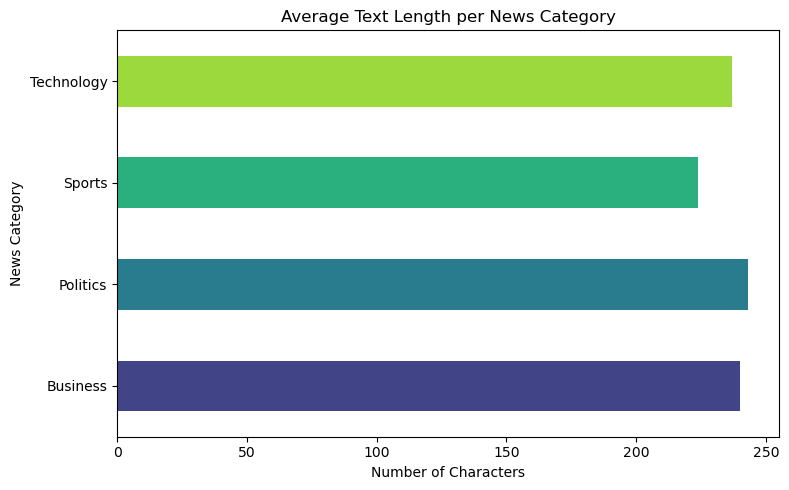

In [49]:
df['text_length'] = df['text'].apply(len)
avg_length = df.groupby('label')['text_length'].mean()

colors = plt.cm.viridis(np.linspace(0.2, 0.85, len(avg_length)))

plt.figure(figsize=(8, 5))
avg_length.plot(
    kind='barh',
    color=colors
)

plt.title("Average Text Length per News Category")
plt.xlabel("Number of Characters")
plt.ylabel("News Category")
plt.tight_layout()
plt.show()

> A bar chart visualizes the average text length per category.

### **Text Cleaning and Stopword Removal**

In [50]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['text'] = df['text'].apply(clean_text)

In [51]:
df

,Class Index,text,label,text_length
0,3,bbc set major shake claims newspaper london br...,Business,288
1,3,marsh averts cash crunch embattled insurance b...,Business,174
2,2,jeter yankees look take control ap ap derek je...,Sports,165
3,4,flying sun safety genesis capsule comes back e...,Technology,173
4,3,stocks seen flat nortel oil weigh new york reu...,Business,385
...,...,...,...,...
9995,4,another reversal intel kills gig chip leading ...,Technology,177
9996,1,bush taps nicholson veterans affairs ap ap pre...,Politics,274
9997,3,stocks inch durable goods report new york reut...,Business,246
9998,3,fleet workers get pink slips staff writer staf...,Business,261


### **Feature & Target Separation**

In [52]:
X = df["text"]
y = df["label"]


### **Text Vectorization (TF-IDF)**

In [53]:
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)

X_tfidf = tfidf.fit_transform(X)


### **Train-Test Split**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)


## **Model Implementation**
### **Naive Bayes**


In [55]:
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

### **Accuracy**

In [56]:
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", acc_nb)


Naive Bayes Accuracy: 0.8876666666666667


### **Logistic Regression**

In [57]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### **Accuracy**

In [58]:
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", acc_lr)


Logistic Regression Accuracy: 0.8896666666666667


### **Random Forest Classifier**

In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### **Accuracy**

In [60]:
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.8473333333333334


### **Accuracy Comparison**

Compare all three models

In [61]:
results = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "Random Forest"],
    "Accuracy": [acc_nb, acc_lr, acc_rf]
})

results


,Model,Accuracy
0,Naive Bayes,0.887667
1,Logistic Regression,0.889667
2,Random Forest,0.847333


### **Evaluation**



### **Confusion Matrix**

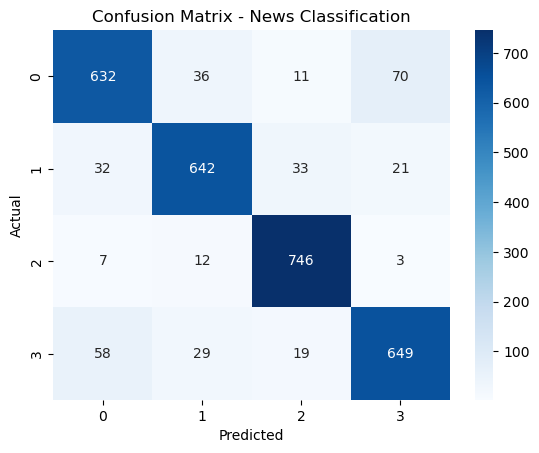

In [62]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - News Classification")
plt.show()


### **Classification Report**

In [63]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

    Business       0.87      0.84      0.86       749
    Politics       0.89      0.88      0.89       728
      Sports       0.92      0.97      0.95       768
  Technology       0.87      0.86      0.87       755

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



**Models were evaluated using:**

* Accuracy score

* Confusion matrix

* Precision, Recall, and F1-score

> Logistic Regression achieved the highest accuracy of approximately 89%, making it the best-performing model.

### **Final Model & Prediction On sample Text**

> A pipeline combining TF-IDF and Logistic Regression was created for efficient training and prediction.
The trained model successfully classified real-world news examples such as political announcements, sports results, business updates, and technology launches.

In [64]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], y, test_size=0.3, random_state=42
)

# Pipeline
model = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        max_features=30000,
        ngram_range=(1, 2)
    )),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=30000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('classifier', LogisticRegression(max_iter=1000))])

In [65]:
# Predict
y_pred = model.predict(X_test)

# Prediction function
def predict_news(text):
    return model.predict([text])[0]

# Test
print(predict_news("Government announces new election reforms"))
print(predict_news("India wins the final cricket match"))
print(predict_news("Apple launches new AI-powered laptop"))
print(predict_news("Stock market jumps after earnings report"))


Politics
Sports
Technology
Business


### **Results Summary**

| Model               | Accuracy |
| ------------------- | -------- |
| Naive Bayes         | ~88.7%   |
| Logistic Regression | ~88.9%   |
| Random Forest       | ~84.7%   |

### **Key Observations**

* Sports articles achieved the highest classification accuracy

* The model performed consistently across all categories

* Logistic Regression showed the best balance of precision and recall

## **Conclusion**

This project successfully demonstrates how machine learning and NLP techniques can be used to automatically classify news articles into meaningful categories. By using TF-IDF for feature extraction and comparing multiple classifiers, the system achieved a high accuracy of nearly 89%.

Among the tested models, Logistic Regression performed the best and was selected as the final classifier. The project highlights the effectiveness of traditional machine learning algorithms for text classification tasks and provides a strong foundation for real-world news categorization systems.

### **Future Enhancements**

* Implement deep learning models such as LSTM or BERT

* Increase the number of news categories

* Perform hyperparameter tuning

* Deploy the model as a web or mobile application